In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('tp1.mplstyle')

In [2]:
A = 1
F = 1

# Pulse wave
x = lambda t: A * np.sign(np.sin(2 * np.pi * F * t))

# Sawtooth wave
y = lambda t: A * (t * F - np.floor(0.5 + t * F))

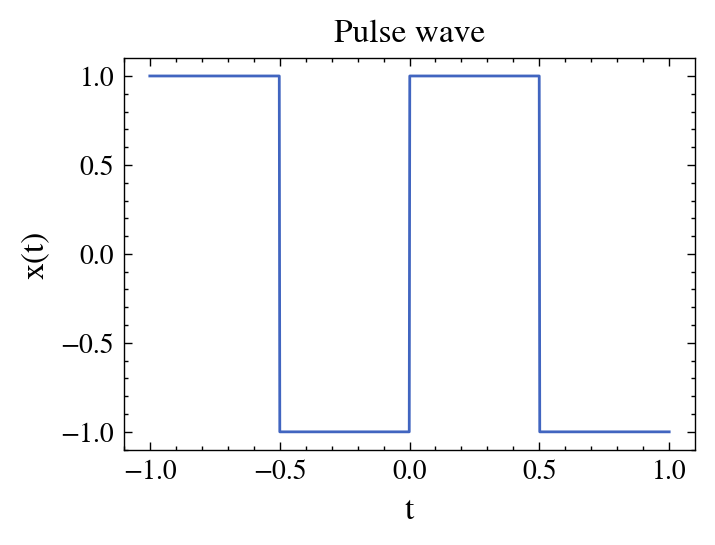

In [3]:
# Plot pulse wave

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave')
plt.show()

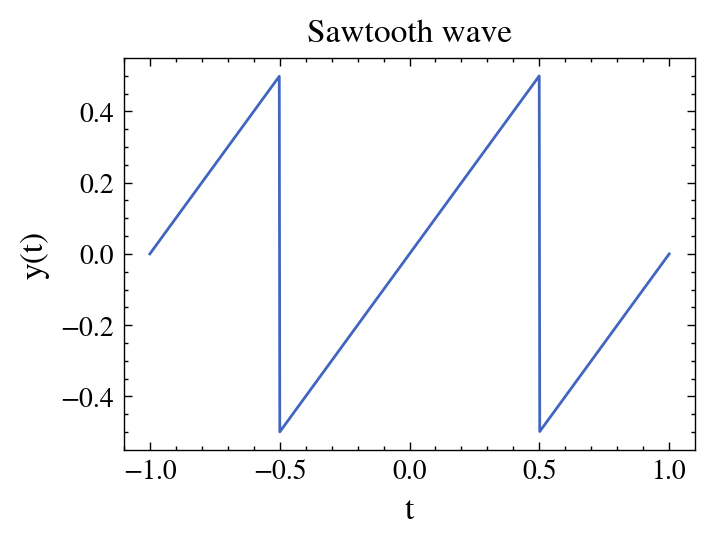

In [4]:
# Plot sawtooth wave

t = np.linspace(-1, 1, 1000)
plt.plot(t, y(t))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Sawtooth wave')
plt.show()

In [5]:
def trigFourierSeries(an: callable, bn: callable, a0: float, T: float, N: int) -> callable:
    """
    Returns the trigonometric Fourier series of the function given
    the coefficients an and bn and the number of terms N.
    :param an: function that returns the coefficient an
    :param bn: function that returns the coefficient bn
    :param a0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return a0 / 2 + sum(an(n) * np.cos(2 * np.pi * n * t / T) + bn(n) * np.sin(2 * np.pi * n * t / T) for n in range(1, N + 1))
    return f

def expFourierSeries(cn: callable, c0: float, T: float, N: int) -> callable:
    """
    Returns the exponential Fourier series of the function given
    the coefficient cn and the number of terms N.
    :param cn: function that returns the coefficient cn
    :param c0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return c0 + sum(cn(n) * np.exp(2 * np.pi * 1j * n * t / T) for n in range(-N, N + 1) if n != 0)
    return f

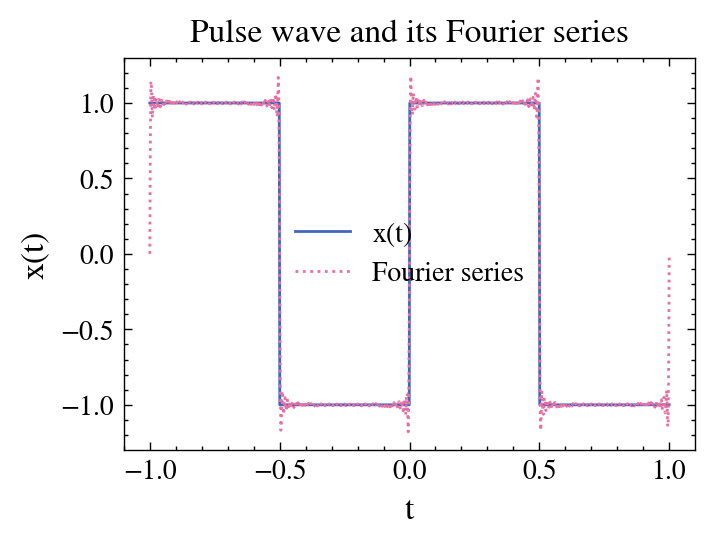

/home/segu/miniconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


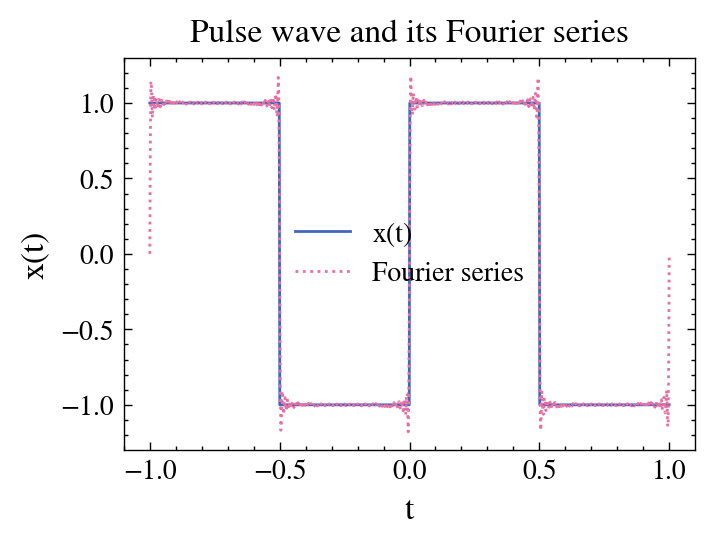

In [6]:
# Pulse wave Fourier series

# Trigonometric

a0 = 0
an = lambda n: 0
bn = lambda n: -2 * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
T = 1 / F
N = 100

f = trigFourierSeries(an, bn, a0, T, N)

# Plot pulse wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t), label='x(t)')
plt.plot(t, f(t), label='Fourier series')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave and its Fourier series (trigonometric)')
plt.legend()
plt.show()

# Exponential

c0 = 0
cn = lambda n: 1j * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
T = 1 / F
N = 100

f = expFourierSeries(cn, c0, T, N)

# Plot pulse wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t), label='x(t)')
plt.plot(t, f(t), label='Fourier series')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave and its Fourier series (exponential)')
plt.legend()
plt.show()

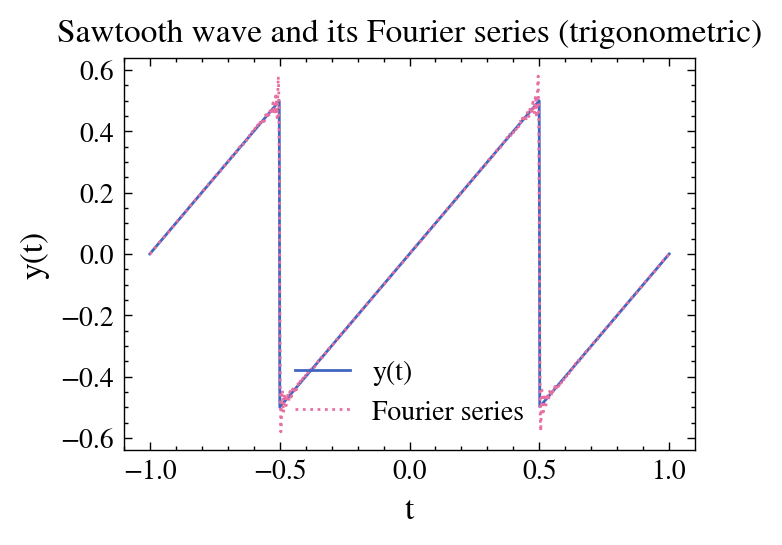

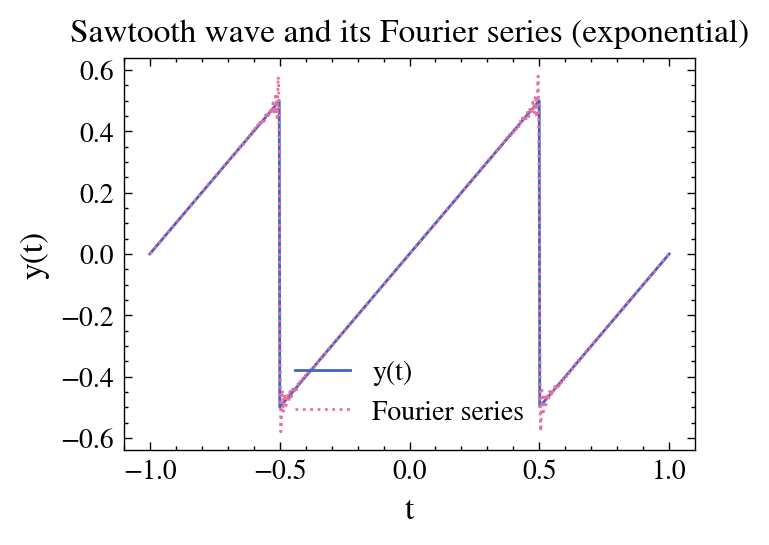

In [39]:
# Sawtooth wave Fourier series

# Trigonometric

a0 = 0
an = lambda n: -2 * A * F * (np.sin(np.pi * n) / (np.pi * n)) 
bn = lambda n: -A * (np.cos(np.pi * n) / (np.pi * n))
T = 1 / F
N = 100

f = trigFourierSeries(an, bn, a0, T, N)

# Plot sawtooth wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, y(t), label='y(t)')
plt.plot(t, f(t), label='Fourier series')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Sawtooth wave and its Fourier series (trigonometric)')
plt.legend()
plt.show()

# Exponential

c0 = 0
cn = lambda n: (A / (np.pi * n)) * (0.5j * np.cos(np.pi * n) - F * np.sin(np.pi * n))
T = 1 / F
N = 100

f = expFourierSeries(cn, c0, T, N)

# Plot sawtooth wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, y(t), label='y(t)')
plt.plot(t, f(t), label='Fourier series')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Sawtooth wave and its Fourier series (exponential)')
plt.legend()
plt.show()